# Terrascope catalogue client
This notebook shows the usage of the Python client for the Terrascope catalogue. API documentation is available [here](https://vitobelgium.github.io/terracatalogueclient/).

In [1]:
import datetime as dt
import getpass
from terracatalogueclient import Catalogue
# initialize the catalogueclient
catalogue = Catalogue()

In [2]:
# get all collections
collections = catalogue.get_collections()
for collection in collections:
    print("{}: {}".format(collection.id, collection.properties['title']))

urn:eop:VITO:CGS_S1_GRD_L1: Sentinel-1 Level-1 Ground Range Detected (GRD) products
urn:eop:VITO:CGS_S1_GRD_SIGMA0_L1: Sentinel-1 Level-1 Ground Range Detected (GRD) SIGMA0 products
urn:eop:VITO:CGS_S1_SLC_L1: Sentinel-1 Level-1 Single Look Complex (SLC) products.
urn:eop:VITO:CGS_S2_L1C: Sentinel-2 Level-1C MSI product contains Top-of-atmosphere reflectances in cartographic geometry
urn:eop:VITO:COP_DEM_EU_25M: Copernicus European Digital Elevation Model (EU-DEM), version 1.1 in 25m resolution
urn:eop:VITO:COP_DEM_GLO_30M_COG: Copernicus Global 30 meter Digital Elevation Model dataset in COG format  
urn:eop:VITO:COP_DEM_GLO_90M_COG: Copernicus Global 90 meter Digital Elevation Model dataset in COG format
urn:eop:VITO:ESA_WORLDCEREAL_ACTIVECROPLAND_V1: ESA WorldCereal products for active cropland per agro-ecological zone - V1
urn:eop:VITO:ESA_WORLDCEREAL_IRRIGATION_V1: ESA WorldCereal products for active irrigation per agro-ecological zone - V1
urn:eop:VITO:ESA_WORLDCEREAL_MAIZE_V1: E

In [3]:
# let's also print the data access URLs
for collection in collections:
    print("{}: {}".format(collection.id, collection.properties['title']))

# no results? Mind that you can only iterate once over the collection as it's a Python generator!
# if you want to be able to iterate over the results more than once, you can convert it to a list
# mind that this will load all results in memory, which could be huge depending on the number of results returned!

persistent_collections = list(catalogue.get_collections())

In [4]:
# let's filter on collections derived from Sentinel-2 data and show resolution
collections = catalogue.get_collections(platform="Sentinel-2")
for collection in collections:
    print("{}, format {}, resolution {} m".format(collection.id,
                                                  collection.properties["productInformation"]["format"],
                                                  collection.properties["productInformation"]["resolution"]))

urn:eop:VITO:CGS_S2_L1C, format jp2, resolution [10, 20, 60] m
urn:eop:VITO:ESA_WORLDCEREAL_ACTIVECROPLAND_V1, format geotiff, resolution [10] m
urn:eop:VITO:ESA_WORLDCEREAL_IRRIGATION_V1, format geotiff, resolution [10] m
urn:eop:VITO:ESA_WORLDCEREAL_MAIZE_V1, format geotiff, resolution [10] m
urn:eop:VITO:ESA_WORLDCEREAL_SPRINGCEREALS_V1, format geotiff, resolution [10] m
urn:eop:VITO:ESA_WORLDCEREAL_TEMPORARYCROPS_V1, format geotiff, resolution [10] m
urn:eop:VITO:ESA_WORLDCEREAL_WINTERCEREALS_V1, format geotiff, resolution [10] m
urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1, format geotiff, resolution [10, 60] m
urn:eop:VITO:ESA_WorldCover_10m_2020_V1, format geotiff, resolution [10, 60] m
urn:eop:VITO:ESA_WorldCover_10m_2021_AWS_V2, format geotiff, resolution [10, 60] m
urn:eop:VITO:ESA_WorldCover_10m_2021_V2, format geotiff, resolution [10, 60] m
urn:eop:VITO:ESA_WorldCover_NDVI_10m_2020_V1, format geotiff, resolution [10] m
urn:eop:VITO:ESA_WorldCover_NDVI_10m_2021_V2, format geo

In [5]:
# next, we want to know the number of products per collection for 2019
collections = catalogue.get_collections()
for collection in collections:
    print("{}: {}".format(collection.id,
                          catalogue.get_product_count(collection.id, 
                                                      start=dt.date(2019, 1, 1), 
                                                      end=dt.date(2020, 1, 1))))

urn:eop:VITO:CGS_S1_GRD_L1: 6399
urn:eop:VITO:CGS_S1_GRD_SIGMA0_L1: 5608
urn:eop:VITO:CGS_S1_SLC_L1: 1235
urn:eop:VITO:CGS_S2_L1C: 15979
urn:eop:VITO:COP_DEM_EU_25M: 0
urn:eop:VITO:COP_DEM_GLO_30M_COG: 17
urn:eop:VITO:COP_DEM_GLO_90M_COG: 17
urn:eop:VITO:ESA_WORLDCEREAL_ACTIVECROPLAND_V1: 0
urn:eop:VITO:ESA_WORLDCEREAL_IRRIGATION_V1: 0
urn:eop:VITO:ESA_WORLDCEREAL_MAIZE_V1: 0
urn:eop:VITO:ESA_WORLDCEREAL_SPRINGCEREALS_V1: 0
urn:eop:VITO:ESA_WORLDCEREAL_TEMPORARYCROPS_V1: 0
urn:eop:VITO:ESA_WORLDCEREAL_WINTERCEREALS_V1: 0
urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1: 2651
urn:eop:VITO:ESA_WorldCover_10m_2020_V1: 2651
urn:eop:VITO:ESA_WorldCover_10m_2021_AWS_V2: 0
urn:eop:VITO:ESA_WorldCover_10m_2021_V2: 0
urn:eop:VITO:ESA_WorldCover_NDVI_10m_2020_V1: 18970
urn:eop:VITO:ESA_WorldCover_NDVI_10m_2021_V2: 0
urn:eop:VITO:ESA_WorldCover_S1VVVHratio_10m_2020_V1: 17367
urn:eop:VITO:ESA_WorldCover_S1VVVHratio_10m_2021_V2: 0
urn:eop:VITO:ESA_WorldCover_S2RGBNIR_10m_2020_V1: 18971
urn:eop:VITO:ESA_

In [6]:
# let's try to access Sentinel 2 NDVI products for May 2019 with tile id 31UGS
products = catalogue.get_products("urn:eop:VITO:TERRASCOPE_S2_NDVI_V2", start=dt.date(2020, 5, 1), end=dt.date(2020, 6, 1), tileId="31UGS")
for product in products:
    print(product.title)

S2A_20200507T104031_31UGS_NDVI_10M_V200
S2A_20200507T104031_31UGS_NDVI_10M_V210
S2A_20200510T105031_31UGS_NDVI_10M_V200
S2A_20200514T103031_31UGS_NDVI_10M_V200
S2A_20200514T103031_31UGS_NDVI_10M_V210
S2A_20200517T104031_31UGS_NDVI_10M_V200
S2A_20200517T104031_31UGS_NDVI_10M_V210
S2A_20200520T105031_31UGS_NDVI_10M_V200
S2A_20200520T105031_31UGS_NDVI_10M_V210
S2A_20200524T103031_31UGS_NDVI_10M_V200
S2A_20200524T103031_31UGS_NDVI_10M_V210
S2A_20200527T104031_31UGS_NDVI_10M_V200
S2A_20200527T104031_31UGS_NDVI_10M_V210
S2A_20200530T105031_31UGS_NDVI_10M_V200
S2A_20200530T105031_31UGS_NDVI_10M_V210
S2B_20200502T103619_31UGS_NDVI_10M_V200
S2B_20200502T103619_31UGS_NDVI_10M_V210
S2B_20200505T104619_31UGS_NDVI_10M_V200
S2B_20200505T104619_31UGS_NDVI_10M_V210
S2B_20200509T102559_31UGS_NDVI_10M_V200
S2B_20200509T102559_31UGS_NDVI_10M_V210
S2B_20200512T103619_31UGS_NDVI_10M_V200
S2B_20200512T103619_31UGS_NDVI_10M_V210
S2B_20200515T104619_31UGS_NDVI_10M_V200
S2B_20200515T104619_31UGS_NDVI_10M_V210


In [7]:
products = catalogue.get_products("urn:eop:VITO:TERRASCOPE_S2_NDVI_V2", start=dt.date(2020, 5, 1), end=dt.date(2020, 6, 1), tileId="31UGS")
for product in products:
    print("{}: {}".format(product.title, product.data[0].href))


S2A_20200507T104031_31UGS_NDVI_10M_V200: https://services.terrascope.be/download/Sentinel2/NDVI_V2/2020/05/07/S2A_20200507T104031_31UGS_NDVI_V200/S2A_20200507T104031_31UGS_NDVI_10M_V200.tif
S2A_20200507T104031_31UGS_NDVI_10M_V210: https://services.terrascope.be/download/Sentinel2/NDVI_V2/2020/05/07/S2A_20200507T104031_31UGS_NDVI_V210/S2A_20200507T104031_31UGS_NDVI_10M_V210.tif
S2A_20200510T105031_31UGS_NDVI_10M_V200: https://services.terrascope.be/download/Sentinel2/NDVI_V2/2020/05/10/S2A_20200510T105031_31UGS_NDVI_V200/S2A_20200510T105031_31UGS_NDVI_10M_V200.tif
S2A_20200514T103031_31UGS_NDVI_10M_V200: https://services.terrascope.be/download/Sentinel2/NDVI_V2/2020/05/14/S2A_20200514T103031_31UGS_NDVI_V200/S2A_20200514T103031_31UGS_NDVI_10M_V200.tif
S2A_20200514T103031_31UGS_NDVI_10M_V210: https://services.terrascope.be/download/Sentinel2/NDVI_V2/2020/05/14/S2A_20200514T103031_31UGS_NDVI_V210/S2A_20200514T103031_31UGS_NDVI_10M_V210.tif
S2A_20200517T104031_31UGS_NDVI_10M_V200: https://s

In [8]:
# if you're on the Terrascope platform, you probably prefer the direct attachted storage locations iso the https download URLs
products = catalogue.get_products("urn:eop:VITO:TERRASCOPE_S2_NDVI_V2",
                                  start=dt.date(2020, 5, 1), end=dt.date(2020, 6, 1),
                                  tileId="31UGS",
                                  accessedFrom="MEP")
for product in products:
    print("{}: {}".format(product.title, product.data[0].href))

S2A_20200507T104031_31UGS_NDVI_10M_V200: file:///data/MTDA/TERRASCOPE_Sentinel2/NDVI_V2/2020/05/07/S2A_20200507T104031_31UGS_NDVI_V200/S2A_20200507T104031_31UGS_NDVI_10M_V200.tif
S2A_20200507T104031_31UGS_NDVI_10M_V210: file:///data/MTDA/TERRASCOPE_Sentinel2/NDVI_V2/2020/05/07/S2A_20200507T104031_31UGS_NDVI_V210/S2A_20200507T104031_31UGS_NDVI_10M_V210.tif
S2A_20200510T105031_31UGS_NDVI_10M_V200: file:///data/MTDA/TERRASCOPE_Sentinel2/NDVI_V2/2020/05/10/S2A_20200510T105031_31UGS_NDVI_V200/S2A_20200510T105031_31UGS_NDVI_10M_V200.tif
S2A_20200514T103031_31UGS_NDVI_10M_V200: file:///data/MTDA/TERRASCOPE_Sentinel2/NDVI_V2/2020/05/14/S2A_20200514T103031_31UGS_NDVI_V200/S2A_20200514T103031_31UGS_NDVI_10M_V200.tif
S2A_20200514T103031_31UGS_NDVI_10M_V210: file:///data/MTDA/TERRASCOPE_Sentinel2/NDVI_V2/2020/05/14/S2A_20200514T103031_31UGS_NDVI_V210/S2A_20200514T103031_31UGS_NDVI_10M_V210.tif
S2A_20200517T104031_31UGS_NDVI_10M_V200: file:///data/MTDA/TERRASCOPE_Sentinel2/NDVI_V2/2020/05/17/S2A_20

In [9]:
# suppose you only want products with cloud cover <= 10%
products = catalogue.get_products("urn:eop:VITO:TERRASCOPE_S2_NDVI_V2",
                                  start=dt.date(2020, 5, 1), end=dt.date(2020, 6, 1),
                                  tileId="31UGS",
                                  cloudCover=10)
for product in products:
    print("{}: {} % clouds".format(product.title, product.properties["productInformation"]["cloudCover"]))

S2A_20200507T104031_31UGS_NDVI_10M_V200: 0.904653 % clouds
S2A_20200507T104031_31UGS_NDVI_10M_V210: 0.001 % clouds
S2A_20200527T104031_31UGS_NDVI_10M_V200: 5.485129 % clouds
S2A_20200527T104031_31UGS_NDVI_10M_V210: 5.932 % clouds
S2A_20200530T105031_31UGS_NDVI_10M_V200: 8.690194 % clouds
S2A_20200530T105031_31UGS_NDVI_10M_V210: 2.175 % clouds
S2B_20200505T104619_31UGS_NDVI_10M_V200: 7.686716 % clouds
S2B_20200505T104619_31UGS_NDVI_10M_V210: 0.021 % clouds
S2B_20200515T104619_31UGS_NDVI_10M_V200: 0.818888 % clouds
S2B_20200515T104619_31UGS_NDVI_10M_V210: 0.016 % clouds
S2B_20200519T102559_31UGS_NDVI_10M_V210: 8.055 % clouds
S2B_20200529T102559_31UGS_NDVI_10M_V200: 8.282671 % clouds
S2B_20200529T102559_31UGS_NDVI_10M_V210: 4.674 % clouds


In [10]:
# you can also specify a range for the cloud cover
products = catalogue.get_products("urn:eop:VITO:TERRASCOPE_S2_NDVI_V2",
                                  start=dt.date(2020, 5, 1), end=dt.date(2020, 6, 1),
                                  tileId="31UGS",
                                  cloudCover="[10,20[")
for product in products:
    print("{}: {} % clouds".format(product.title, product.properties["productInformation"]["cloudCover"]))

S2A_20200514T103031_31UGS_NDVI_10M_V210: 11.104 % clouds
S2A_20200517T104031_31UGS_NDVI_10M_V210: 18.028 % clouds
S2A_20200520T105031_31UGS_NDVI_10M_V210: 13.794 % clouds
S2B_20200519T102559_31UGS_NDVI_10M_V200: 18.129379 % clouds


In [11]:
# instead of a tile id, you can also use a bbox to query the catalogue
products = catalogue.get_products("urn:eop:VITO:TERRASCOPE_S2_NDVI_V2",
                                  start=dt.date(2020, 5, 1), end=dt.date(2020, 6, 1),
                                  bbox="4.96,51.28,5.06,51.36",
                                  cloudCover="[10,20[")
for product in products:
    print("{}: {} % clouds".format(product.title, product.properties["productInformation"]["cloudCover"]))

S2A_20200520T105031_31UFS_NDVI_10M_V200: 17.530886 % clouds
S2A_20200530T105031_31UFT_NDVI_10M_V200: 10.292502 % clouds
S2A_20200530T105031_31UFT_NDVI_10M_V210: 14.525 % clouds
S2B_20200505T104619_31UFT_NDVI_10M_V200: 17.906182 % clouds
S2B_20200505T104619_31UFT_NDVI_10M_V210: 16.616 % clouds


In [12]:
# specifying a bbox can be done in different formats
products = catalogue.get_products("urn:eop:VITO:TERRASCOPE_S2_NDVI_V2",
                                  start=dt.date(2020, 5, 1), end=dt.date(2020, 6, 1),
                                  bbox=[4.96,51.28,5.06,51.36],
                                  cloudCover="[10,20[")
for product in products:
    print("{}: {} % clouds".format(product.title, product.properties["productInformation"]["cloudCover"]))

S2A_20200520T105031_31UFS_NDVI_10M_V200: 17.530886 % clouds
S2A_20200530T105031_31UFT_NDVI_10M_V200: 10.292502 % clouds
S2A_20200530T105031_31UFT_NDVI_10M_V210: 14.525 % clouds
S2B_20200505T104619_31UFT_NDVI_10M_V200: 17.906182 % clouds
S2B_20200505T104619_31UFT_NDVI_10M_V210: 16.616 % clouds


In [13]:
# same is true for the geometry parameter, you can use a class derived from BaseGeometry
from shapely.geometry import Polygon
polygon = Polygon([(4.968738555908202,51.32052823738613),
                   (4.975605010986327,51.31966997328442),
                   (4.980411529541015,51.3179533969039),
                   (4.979209899902343,51.31548570581677),
                   (4.978694915771484,51.313876270549315),
                   (4.979209899902343,51.31215947736587),
                   (4.970283508300781,51.31548570581677),
                   (4.968738555908202,51.32052823738613)])
products = catalogue.get_products("urn:eop:VITO:TERRASCOPE_S2_NDVI_V2",
                                  start=dt.date(2020, 5, 1), end=dt.date(2020, 6, 1),
                                  geometry=polygon,
                                  cloudCover="[10,20[")
for product in products:
    print("{}: {} % clouds".format(product.title, product.properties["productInformation"]["cloudCover"]))

S2A_20200520T105031_31UFS_NDVI_10M_V200: 17.530886 % clouds


In [14]:
# or you can specify it as WKT string:
from shapely.geometry import Polygon
polygon = "POLYGON ((4.968738555908202 51.32052823738613, 4.975605010986327 51.31966997328442, 4.980411529541015 51.3179533969039, 4.979209899902343 51.31548570581677, 4.978694915771484 51.31387627054931, 4.979209899902343 51.31215947736587, 4.970283508300781 51.31548570581677, 4.968738555908202 51.32052823738613))"
products = catalogue.get_products("urn:eop:VITO:TERRASCOPE_S2_NDVI_V2",
                                  start=dt.date(2020, 5, 1), end=dt.date(2020, 6, 1),
                                  geometry=polygon,
                                  cloudCover="[10,20[")
for product in products:
    print("{}: {} % clouds".format(product.title, product.properties["productInformation"]["cloudCover"]))

S2A_20200520T105031_31UFS_NDVI_10M_V200: 17.530886 % clouds


In [15]:
# from the API docs, you can see supported arguments; we also support kwargs for less frequently used parameters (lat, lon and radius)
products = catalogue.get_products(collection='urn:eop:VITO:TERRASCOPE_S2_NDVI_V2', 
                                  start=dt.date(2020, 5, 1), end=dt.date(2020, 6, 1),
                                  lat=50.5, lon=5, radius=100)
for product in products:
    print("{}: {} % clouds".format(product.title, product.properties["productInformation"]["cloudCover"]))

S2A_20200507T104031_31UFR_NDVI_10M_V200: 11.571129 % clouds
S2A_20200507T104031_31UFR_NDVI_10M_V210: 0.04 % clouds
S2A_20200507T104031_31UFS_NDVI_10M_V200: 1.857676 % clouds
S2A_20200507T104031_31UFS_NDVI_10M_V210: 0.043 % clouds
S2A_20200510T105031_31UFR_NDVI_10M_V200: 94.701839 % clouds
S2A_20200510T105031_31UFR_NDVI_10M_V210: 79.579 % clouds
S2A_20200510T105031_31UFS_NDVI_10M_V210: 98.41 % clouds
S2A_20200517T104031_31UFR_NDVI_10M_V200: 4.234795 % clouds
S2A_20200517T104031_31UFR_NDVI_10M_V210: 2.69 % clouds
S2A_20200517T104031_31UFS_NDVI_10M_V200: 31.65485 % clouds
S2A_20200517T104031_31UFS_NDVI_10M_V210: 34.999 % clouds
S2A_20200520T105031_31UFR_NDVI_10M_V200: 0.529267 % clouds
S2A_20200520T105031_31UFR_NDVI_10M_V210: 0.155 % clouds
S2A_20200520T105031_31UFS_NDVI_10M_V200: 17.530886 % clouds
S2A_20200520T105031_31UFS_NDVI_10M_V210: 21.84 % clouds
S2A_20200527T104031_31UFR_NDVI_10M_V200: 9.642383 % clouds
S2A_20200527T104031_31UFR_NDVI_10M_V210: 0.984 % clouds
S2A_20200527T104031_3

In [16]:
import ipywidgets as widgets

valid_output = widgets.Valid(value=False)

def on_submit_func(button):
    button.disabled=True
    valid_output.value=True

pwd_input = widgets.Password(value='password',
                             placeholder='Enter password',
                             description='Password:',
                             disabled=False)


pwd_input.observe(on_submit_func,'value')

left_box = widgets.VBox([pwd_input])
right_box = widgets.VBox([valid_output])
widgets.HBox([left_box, right_box])

In [17]:
# let's download one of the files to show you how files can be downloaded when not working on the Terrascope platform
products = catalogue.get_products("urn:eop:VITO:TERRASCOPE_S2_NDVI_V2",
                                  start=dt.date(2020, 5, 1), end=dt.date(2020, 6, 1),
                                  title="S2A_20200520T105031_31UGS_NDVI_10M_V200")
catalogue.authenticate_non_interactive(username=getpass.getuser(), password=pwd_input.value)
for product in products:
    catalogue.download_file(product.data[0], '/tmp')

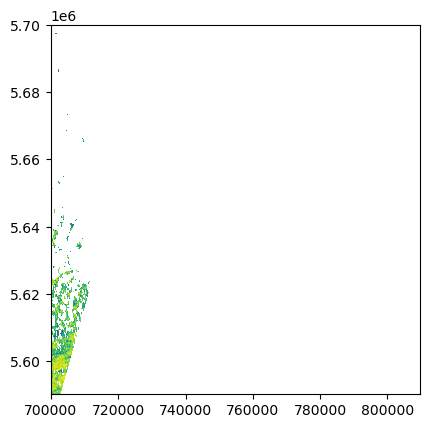

<Axes: >

In [18]:
# verify that the file was downloaded

import rasterio
from rasterio.plot import show
fp = r'/tmp/S2A_20200520T105031_31UGS_NDVI_10M_V200.tif'
img = rasterio.open(fp)
show(img)
